# Assignment 1
## Name: Pranoy K P  
## Roll No. ED20B045

## 1. Let us consider the MNIST, a dataset of hand-written digits [Click here to download the dataset]. The objective here is to de-noise the images provided. Then, perform the following tasks.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

### (a) Load the dataset and visually see the images (16×16 pixels).

In [2]:
df = pd.read_csv('noisy_mnist.csv', header = None)

In [3]:
print(df.head())

        0         1         2         3         4         5         6    \
0  0.264608  0.060024  0.146811  0.336136  0.280311 -0.139760  0.233830   
1 -0.108767 -0.202736 -0.170056  0.332693  0.186255  0.280204  0.253478   
2 -0.199832 -0.295294 -0.099008  0.026376  0.074813  0.157204  0.042648   
3  0.277441 -0.031975 -0.070889  0.047647  0.075778  0.556461  0.741170   
4  0.256846 -0.118795 -0.155106 -0.134832  0.297439  0.241704  0.469472   

        7         8         9    ...       246       247       248       249  \
0  0.371765  0.669086  0.530387  ...  0.911594  1.065910  0.813509  0.559103   
1  0.363563  0.039638  0.300219  ...  0.564037  0.439045  0.601399  0.758090   
2  0.261847 -0.017913  0.042030  ...  0.006110 -0.227748  0.048597  0.511590   
3  0.604523  0.770517  0.562931  ...  0.290294  0.645014  0.688283 -0.053283   
4  0.815539  0.763322  0.545774  ...  0.475727  1.085077  1.194813  0.838231   

        250       251       252       253       254       255  
0  0

In [4]:
df.shape

(9298, 256)

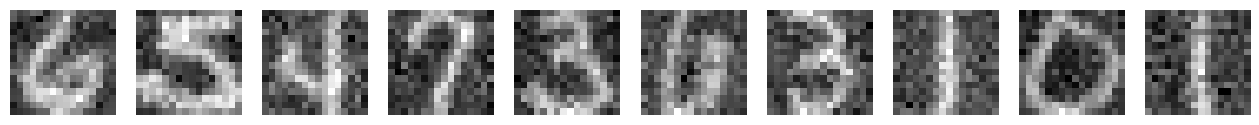

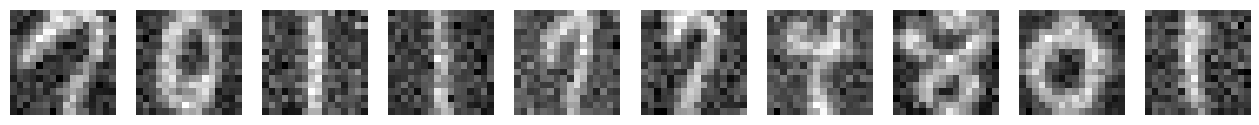

In [5]:
# Reshape each row into a 16x16 image
images = df.values.reshape(-1, 16, 16)

# Number of images
num_samples = len(images)

# Create a function to display images in batches
def display_images(start_index, batch_size):
    end_index = start_index + batch_size
    if end_index > num_samples:
        end_index = num_samples

    fig, axes = plt.subplots(1, batch_size, figsize=(16, 4))

    for i in range(start_index, end_index):
        axes[i - start_index].imshow(images[i], cmap='gray')
        axes[i - start_index].axis('off')
    
    plt.show()

# Define the batch size and initial index
batch_size = 10
current_index = 0

# Display images in batches
while current_index < num_samples:
    display_images(current_index, batch_size)
    user_input = input("Press Enter to view the next batch or type exit to quit: ")
    if user_input.lower() == 'exit':
        break
    current_index += batch_size


In [6]:
# Function to plot the images 
def plot_mnist_images(X):
    # X: MNIST image
    fig, ax = plt.subplots (10, 10, figsize = (5,5)) 
    ax = ax.flatten()
    for img, a in zip (X,ax):
        a.imshow(img.reshape(16,16), cmap='Greys')
        a.axis('off')

In [7]:
X = np.array(df)
df.shape

(9298, 256)

### (b) Split the obtained dataset into training and testing samples with the training set having 80% of samples, and the remaining 20% of samples in the test set. Use the training set for applying PCA to perform de-noising of the images. Write your own codes to perform PCA using the singular value decomposition (SVD) algorithm. You can use the in-built functions in Python for the SVD.

In [8]:
X_train, X_test = train_test_split(X, train_size = 0.8)

In [9]:
# SVD
U,S,Vt = np.linalg.svd(X_train)

In [10]:
# Function to get the principal components 
def get_principal_comps (X, Vt,n):
    # X: data matrix, Vt: right singular matrix
    PC = X@(Vt.T)
    return PC[:,:n]

# Function to reconstruct the images 
def reconstruct_data_mat (PC, Vt,n):
    # PC: principal components. Vt: Right singular matrix
    X_ = PC@(Vt[:n, :])
    return X_

In [11]:
n = 256
PC_image = get_principal_comps(X_train,Vt,n)
recons_img = reconstruct_data_mat(PC_image,Vt,n)

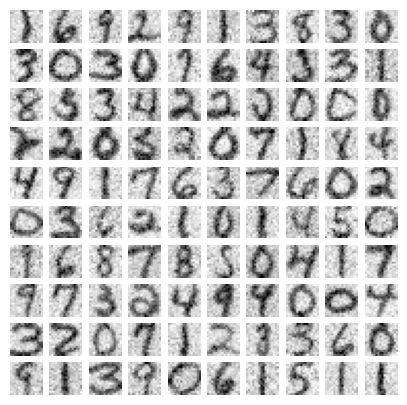

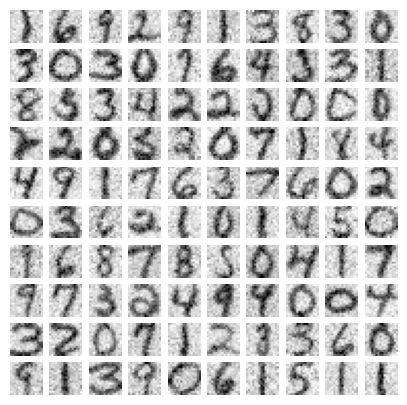

In [12]:
plot_mnist_images(X_train)
plot_mnist_images(recons_img)

### (c) Do PCA on the training set and choose the appropriate number of principal components by visually analyzing the de-noised images (You have to reconstruct the entire image from the principal components)

Reconstructed Images (n=10)
Reconstructed Images (n=25)
Reconstructed Images (n=50)
Reconstructed Images (n=100)
Reconstructed Images (n=150)
Reconstructed Images (n=200)
Reconstructed Images (n=250)


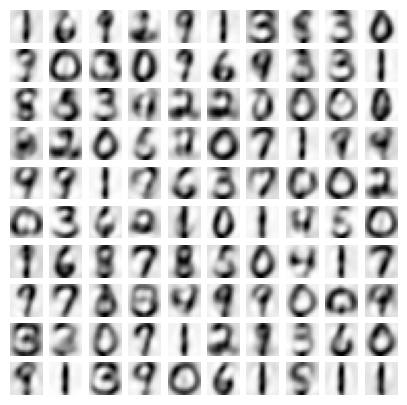

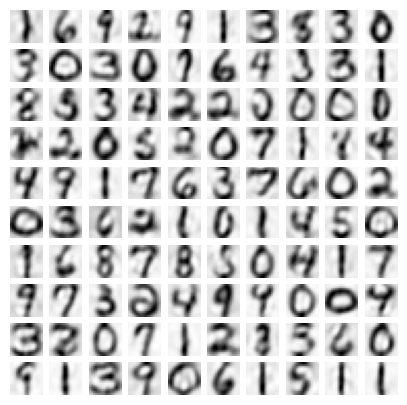

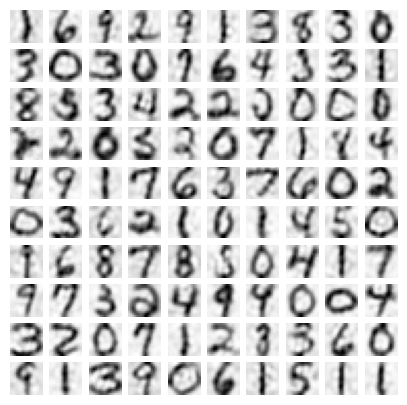

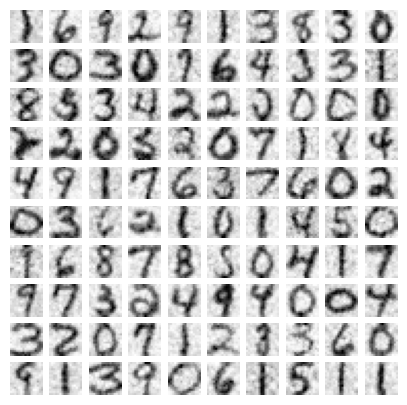

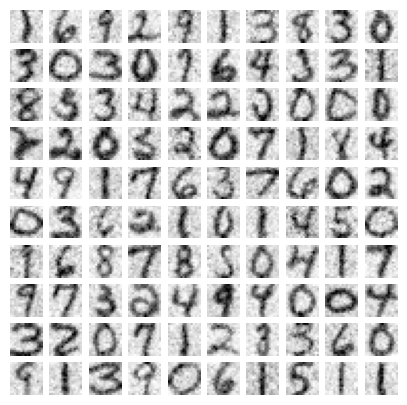

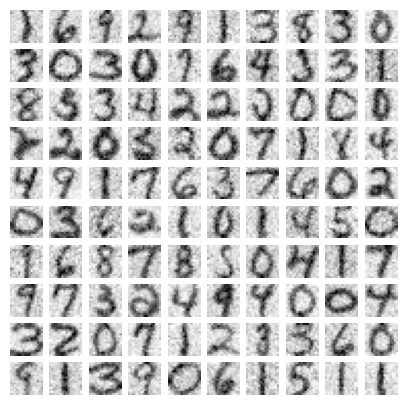

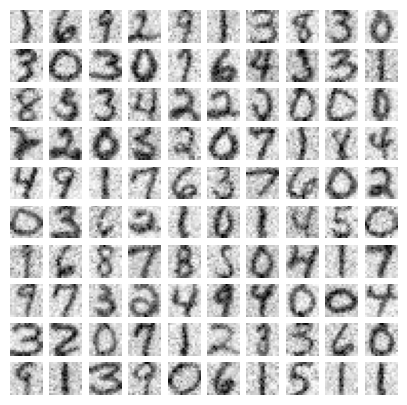

In [13]:
# Define a range of values for n (number of principal components to retain)
n_values = [10, 25, 50, 100, 150, 200, 250]

# Perform PCA for different values of n and visualize the denoised images
for n in n_values:
    # Get principal components
    PC_image = get_principal_comps(X_train, Vt, n)
    
    # Reconstruct the training data
    recons_img = reconstruct_data_mat(PC_image, Vt, n)
    
    # Print the title
    print(f'Reconstructed Images (n={n})')
    
    # Visualize the denoised images
    plot_mnist_images(recons_img)

### The noise is considerably reduced in the range 50-100 without much loss of data. Below 50 the image is very blurred and above it the image has too much noise. This count can be further optimised by taking components between the range 50-100. Further iterations could provide better balance between denoising and loss of data.

Reconstructed Images (n=50)
Reconstructed Images (n=60)
Reconstructed Images (n=70)
Reconstructed Images (n=80)
Reconstructed Images (n=90)
Reconstructed Images (n=100)


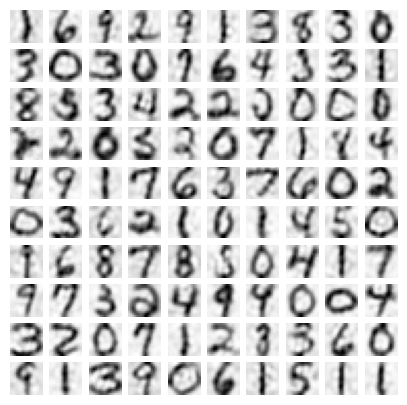

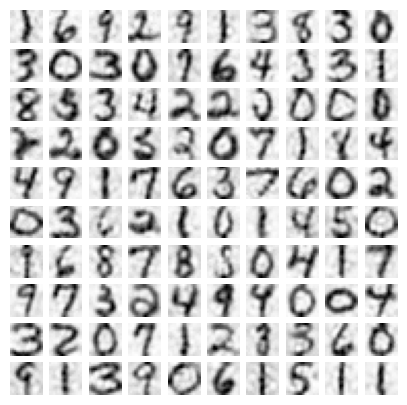

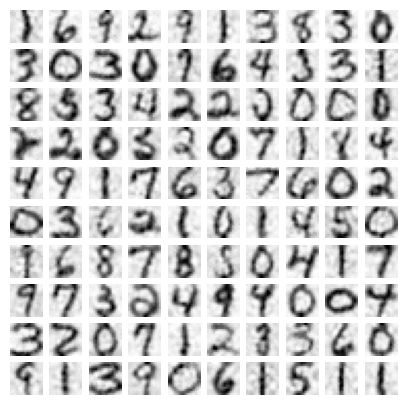

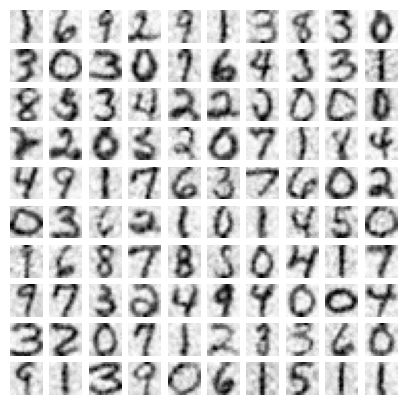

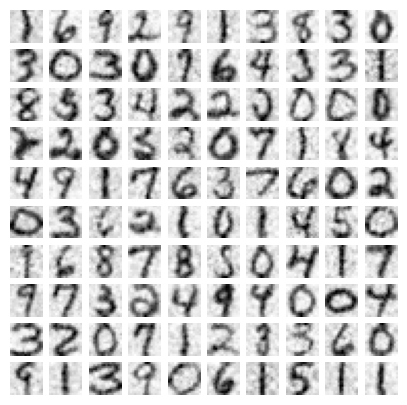

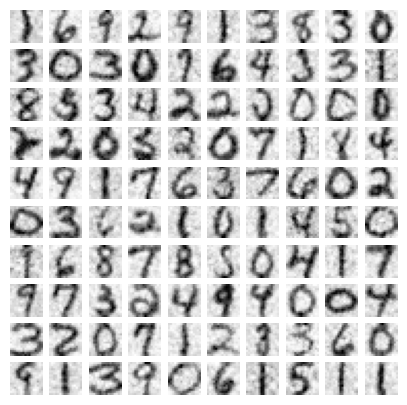

In [14]:
# Define a range of values for n (number of principal components to retain)
n_final_values = [x for x in range (50,110,10)]

# Perform PCA for different values of n and visualize the denoised images
for n in n_final_values:
    # Get principal components
    PC_image = get_principal_comps(X_train, Vt, n)
    
    # Reconstruct the training data
    recons_img = reconstruct_data_mat(PC_image, Vt, n)
    
    # Print the title
    print(f'Reconstructed Images (n={n})')
    
    # Visualize the denoised images
    plot_mnist_images(recons_img)

### An appropriate number of principal components for visualising the denoised images is 50, since increasing components does not seem to be very useful.

### (d) Plot the randomly chosen de-noised test images and note down your observations

Reconstructed Images (n=50)


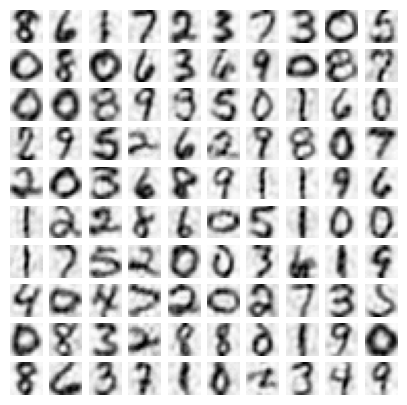

In [18]:
# Get principal components
PC_test = get_principal_comps(X_test, Vt, 50)

# Reconstruct the training data
recons_img = reconstruct_data_mat(PC_test, Vt, 50)

# Print the title
print(f'Reconstructed Images (n={50})')

# Visualize the denoised images
plot_mnist_images(recons_img)

## Observation
Noise Reduction: The de-noised images clearly demonstrated a reduction in noise compared to their original counterparts. Background noise, which was initially present in the original images, appeared less pronounced in the de-noised versions.

Loss of Detail, Smoothing and Blurring: It's important to note that when using a lower number of principal components for de-noising, there was a noticeable trade-off. While noise was effectively reduced, there was a slight loss of fine details in the images. This resulted in a blurriness or reduced sharpness when compared to the original images. De-noised images also exhibited a smoothing effect, particularly in areas with texture or sharp transitions. 

Optimal Number of Principal Components: Upon careful observation of de-noised images at various numbers of principal components, a distinct pattern emerged. There appeared to be an optimal range where noise reduction was effective without overly compromising image quality. This range allowed for a balanced approach to noise reduction and image clarity. This range falls somewhere between 50-100 components.

## 2. Given that the data is not standardized and columns have zero mean, obtain the relation between the singular values obtained by applying SVD on the data matrix and the eigenvalues of the covariance matrix.

### Check end for handwritten solutions

## 3. Generate a data matrix, X with 200 samples and 10 features. (You can assume any distribution).

In [19]:
# importing necessary packages
import numpy as np
import matplotlib as plt

In [20]:
# seed to get constant values
np.random.seed(42)

Let us assume normal distribution

In [21]:
# generate a normal dataset
X = np.random.normal(0, 2, size = (200,10))

### (a) Perform PCA on the matrix and get the first 2 principal components for all the samples

In [22]:
# SVD
U,S,Vt = np.linalg.svd(X)

In [23]:
print(U.shape,S.shape,Vt.shape)

(200, 200) (10,) (10, 10)


In [24]:
# Function to get the principal components 
def get_principal_comps (X, Vt,n):
    # X: data matrix, Vt: right singular matrix
    PC = X@(Vt.T)
    return PC[:,:n]

In [25]:
# perform PCA and get the first 2 principal components for all samples
PC = get_principal_comps(X,Vt,2)

In [26]:
print(PC[0:10])

[[ 2.49709594 -0.83997717]
 [-1.57825482  2.69370692]
 [-1.12753302  2.63318681]
 [-4.33505452  0.7743873 ]
 [-1.35639119  0.69920028]
 [ 0.99089568 -0.3587793 ]
 [-0.87945984 -2.62018755]
 [-0.59341777  0.03773606]
 [ 0.18302839  1.04688458]
 [-2.22860789 -1.14654354]]


In [27]:
# function to obtain variance explained
def get_var(S,n):
    # S: vector of single values
    eig = S**2
    return eig[n]/np.sum(eig)


In [28]:
first_comp_var_exp = get_var(S,1)
print(first_comp_var_exp)

0.12332788940034294


In [29]:
second_comp_var_exp = get_var(S,2)
print(second_comp_var_exp)

0.11835069469664507


### (b) Calculate the sum of the distance between all the samples and the plane formed by the obtained 2 principal components.

In [30]:
# Calculate the mean of the data
mean = np.mean(X, axis=0)

# Calculate the sum of distances between samples and the plane formed by the first 2 principal components
sum_of_distances = 0
for i in range(X.shape[0]):
    distance = np.linalg.norm(X[i] - mean - PC[i, 0] * Vt[0, :] - PC[i, 1] * Vt[1, :])
    sum_of_distances += distance

print("Direction of the plane formed by the first 2 principal components:", Vt[:2, :])
print("Sum of distances for the plane formed by the first 2 principal components:", sum_of_distances)

Direction of the plane formed by the first 2 principal components: [[ 0.04732586 -0.75694464  0.05041621  0.3287462  -0.25543734  0.24298967
   0.31315648 -0.0457064   0.07084292  0.29105366]
 [ 0.26978587 -0.22294344  0.62154962 -0.06075614 -0.12742787 -0.1366051
  -0.52379048 -0.29620584 -0.29200073 -0.07238067]]
Sum of distances for the plane formed by the first 2 principal components: 1030.4159959400874


### (c) Generate 50 random planes and calculate the sum of distances between the samples and each one of the planes. Verify that the sum distances are the least for the plane obtained from principal components

In [31]:
# Generate 50 random planes and calculate the sum of distances for each plane
num_planes = 50
min_sum_of_distances = float('inf')
best_plane = None

for _ in range(num_planes):
    random_normal = np.random.normal(size=10)
    random_normal /= np.linalg.norm(random_normal)
    
    sum_of_dist = 0
    for i in range(X.shape[0]):
        distance = np.linalg.norm(X[i] - mean - np.dot(X[i] - mean, random_normal) * random_normal)
        sum_of_dist += distance
        
    if sum_of_dist < min_sum_of_distances:
        min_sum_of_distances = sum_of_dist
        best_plane = random_normal

print("Sum of distances for the best plane obtained from random planes:", min_sum_of_distances)
print("Distance from the plane formed by the first 2 principal components is:", sum_of_distances)

Sum of distances for the best plane obtained from random planes: 1132.264611741975
Distance from the plane formed by the first 2 principal components is: 1030.4159959400874


### Hence it is verified that the sum distances are the least for the plane obtained from principal components

## 4. IRIS dataset has four features: sepal length, sepal width, petal length, and petal width that can be used to identify the kind of IRIS species.

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [33]:
# Load the dataset from a CSV file
df = pd.read_csv('Iris.csv')

In [34]:
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [35]:
df.shape

(150, 6)

In [36]:
# Exclude the "Id" and "Species" columns and keep only the feature columns
# You can select the columns you want to include in PCA
feature_columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
X = df[feature_columns].values
y = df["Species"].values

In [37]:
print(X[:10])
print(y[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


In [38]:
# Standardize the feature data
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [39]:
np.random.seed(42)

### (a) Perform PCA on the given dataset and reduce the dimension to two

In [40]:
# SVD
U,S,Vt = np.linalg.svd(X_scaled)

In [41]:
# Function to get the principal components 
def get_principal_comps (X, Vt,n):
    # X: data matrix, Vt: right singular matrix
    PC = X@(Vt.T)
    return PC[:,:n]

# Function to reconstruct the images 
def reconstruct_data_mat (PC, Vt,n):
    # PC: principal components. Vt: Right singular matrix
    X_ = PC@(Vt[:n, :])
    return X_

In [42]:
n_reduced = 2
PC_reduced = get_principal_comps(X_scaled,Vt,n_reduced)

In [43]:
print(PC_reduced)

[[-2.26454173e+00 -5.05703903e-01]
 [-2.08642550e+00  6.55404729e-01]
 [-2.36795045e+00  3.18477311e-01]
 [-2.30419716e+00  5.75367713e-01]
 [-2.38877749e+00 -6.74767397e-01]
 [-2.07053681e+00 -1.51854856e+00]
 [-2.44571134e+00 -7.45626750e-02]
 [-2.23384186e+00 -2.47613932e-01]
 [-2.34195768e+00  1.09514636e+00]
 [-2.18867576e+00  4.48629048e-01]
 [-2.16348656e+00 -1.07059558e+00]
 [-2.32737775e+00 -1.58587455e-01]
 [-2.22408272e+00  7.09118158e-01]
 [-2.63971626e+00  9.38281982e-01]
 [-2.19229151e+00 -1.88997851e+00]
 [-2.25146521e+00 -2.72237108e+00]
 [-2.20275048e+00 -1.51375028e+00]
 [-2.19017916e+00 -5.14304308e-01]
 [-1.89407429e+00 -1.43111071e+00]
 [-2.33994907e+00 -1.15803343e+00]
 [-1.91455639e+00 -4.30465163e-01]
 [-2.20464540e+00 -9.52457317e-01]
 [-2.77416979e+00 -4.89517027e-01]
 [-1.82041156e+00 -1.06750793e-01]
 [-2.22821750e+00 -1.62186163e-01]
 [-1.95702401e+00  6.07892567e-01]
 [-2.05206331e+00 -2.66014312e-01]
 [-2.16819365e+00 -5.52016495e-01]
 [-2.14030596e+00 -3

In [44]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### (b) Plot the newly obtained features (Principal components) discriminating the species type

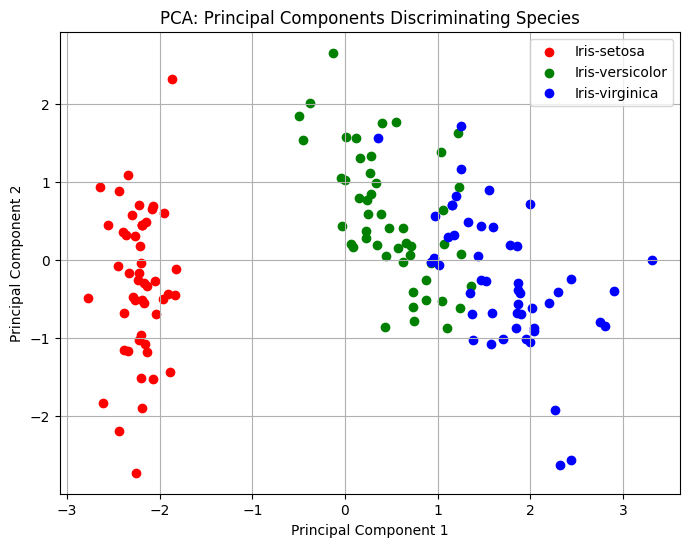

In [45]:
# Add the "Species" column back to the PCA results
X_pca_with_species = pd.DataFrame(data=PC_reduced, columns=["PC1", "PC2"])
X_pca_with_species["Species"] = df["Species"]

# Create a scatter plot for PCA results discriminating by species
species_labels = df["Species"].unique()
colors = ['r', 'g', 'b']  # Define colors for each species

plt.figure(figsize=(8, 6))
for i, species in enumerate(species_labels):
    subset = X_pca_with_species[X_pca_with_species["Species"] == species]
    plt.scatter(subset["PC1"], subset["PC2"], c=colors[i], label=species)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: Principal Components Discriminating Species")
plt.legend()
plt.grid(True)
plt.show()

### (c) Identify which one of the four features can be used to discriminate between the species (Use the coefficient of principal components to answer)

In [46]:
# Get the coefficients (loadings) of the original features in PC1
coefficients_pc1 = Vt[0, :]  # Assuming Vt is the right singular matrix from SVD

# Create a DataFrame to display the coefficients for each feature
coefficients_df1 = pd.DataFrame(data={'Feature': feature_columns, 'Coefficient_PC1': coefficients_pc1})

# Find the feature with the highest absolute coefficient in PC1
most_discriminative_feature1 = coefficients_df1.loc[coefficients_df1['Coefficient_PC1'].abs().idxmax()]

print("Coefficients of Features in PC1:")
print(coefficients_df1)

Coefficients of Features in PC1:
         Feature  Coefficient_PC1
0  SepalLengthCm         0.522372
1   SepalWidthCm        -0.263355
2  PetalLengthCm         0.581254
3   PetalWidthCm         0.565611


In [47]:
print("\nMost Discriminative Feature in PC1 and overall is:")
print(f"Feature: {most_discriminative_feature1['Feature']:15s} Weight (Coefficient): {most_discriminative_feature1['Coefficient_PC1']:.6f}")


Most Discriminative Feature in PC1 and overall is:
Feature: PetalLengthCm   Weight (Coefficient): 0.581254


### Therefore, the most discriminative feature overall should be PetalLengthCm because it has the highest weight on the First Principal Component. 

#### Similarly we can take the variable with highest weight on second component (SepalWidthCm), but however it is not very relevant because it is only the second principal component.

In [48]:
# Get the coefficients (loadings) of the original features in PC1
coefficients_pc2 = Vt[1, :]  # Assuming Vt is the right singular matrix from SVD

# Create a DataFrame to display the coefficients for each feature
coefficients_df2 = pd.DataFrame(data={'Feature': feature_columns, 'Coefficient_PC2': coefficients_pc2})

# Find the feature with the highest absolute coefficient in PC1
most_discriminative_feature2 = coefficients_df2.loc[coefficients_df2['Coefficient_PC2'].abs().idxmax()]

print("Coefficients of Features in PC2:")
print(coefficients_df2)

Coefficients of Features in PC2:
         Feature  Coefficient_PC2
0  SepalLengthCm        -0.372318
1   SepalWidthCm        -0.925556
2  PetalLengthCm        -0.021095
3   PetalWidthCm        -0.065416


### Verification

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset from a CSV file
df = pd.read_csv('Iris.csv')

feature_columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
X = df[feature_columns].values
y = df["Species"].values

# Standardize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA and reduce dimension to two principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Get the coefficients (loadings) of original features for the two principal components
coefficients = pca.components_

# Analyze coefficients to find which features contribute the most to each component
for i, component in enumerate(coefficients):
    print(coefficients[i])
    most_discriminative_feature = feature_columns[np.argmax(np.abs(component))]
    print(f"Principal Component {i + 1}: Most Discriminative Feature: {most_discriminative_feature}")

[ 0.52237162 -0.26335492  0.58125401  0.56561105]
Principal Component 1: Most Discriminative Feature: PetalLengthCm
[0.37231836 0.92555649 0.02109478 0.06541577]
Principal Component 2: Most Discriminative Feature: SepalWidthCm


## 5. A team of scientists has analyzed 90 samples that are a mixture of four different species with different concentrations. It has been established that each specie has its own pure component fingerprint. Three different spectroscopy instruments (InsA, InsB, and InsC) have been used for the same. The dataset can be found in [Dataset, click here to get dataset]. The rows indicate the samples and the columns indicate the wavelengths at which they have been measured.

In [50]:
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [51]:
# Specify the folder path containing the CSV files
folder_path = 'Spectroscopy_data'

# Initialize an empty dictionary to store dataframes
dataframes = {}

# Loop through each CSV file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        dataframe_name = os.path.splitext(file_name)[0]  # Get the file name without extension
        dataframes[dataframe_name] = pd.read_csv(file_path, header = None)

# Now, the dataframes dictionary contains each dataframe with its respective name
# Access them like dataframes['file1'], dataframes['file2'], etc.

In [52]:
print(list(dataframes.keys()))

['InsA', 'InsB', 'InsC', 'Test_data']


In [53]:
# Preprocessing: Standardize the data
scaler = StandardScaler()
scaled_data_insA = scaler.fit_transform(dataframes['InsA'])
scaled_data_insB = scaler.fit_transform(dataframes['InsB'])
scaled_data_insC = scaler.fit_transform(dataframes['InsC'])

In [54]:
scaled_data_insA.shape

(90, 176)

### (a) Perform PCA on each of the datasets and choose the appropriate number of principal components for de-noising the dataset. Use the Scree plot to choose an appropriate number of principal components

In [61]:
# Function to get the principal components 
def get_principal_comps(X, Vt,n):
    # X: data matrix, Vt: right singular matrix
    PC = X@(Vt.T)
    return PC[:,:n]

# function to obtain variance explained
def get_var(S,n):
    # S: vector of single values
    eig = S**2
    return eig[n]/np.sum(eig)

# Function to reconstruct data
def reconstruct_data_mat (PC, Vt,n):
    # PC: principal components. Vt: Right singular matrix
    X_ = PC@(Vt[:n, :])
    return X_

In [62]:
# SVD
Ua,Sa,Vta = np.linalg.svd(scaled_data_insA)
Ub,Sb,Vtb = np.linalg.svd(scaled_data_insB)
Uc,Sc,Vtc = np.linalg.svd(scaled_data_insC)

# Initialize lists to store explained variance for each instrument
explained_variance_insA = []
explained_variance_insB = []
explained_variance_insC = []

In [63]:
# Calculate explained variance for each principal component using your functions
for i in range(1, len(Sa) + 1):
    PC_insA = get_principal_comps(scaled_data_insA, Vta, i-1)
    explained_variance_insA.append(get_var(Sa, i-1))

for i in range(1, len(Sb) + 1):
    PC_insB = get_principal_comps(scaled_data_insB, Vtb, i-1)
    explained_variance_insB.append(get_var(Sb, i-1))

for i in range(1, len(Sc) + 1):
    PC_insC = get_principal_comps(scaled_data_insC, Vtc, i-1)
    explained_variance_insC.append(get_var(Sc, i-1))

### First let us do a scree plot across all the components (1 to 90) in order to get a rough idea of the location of elbow point

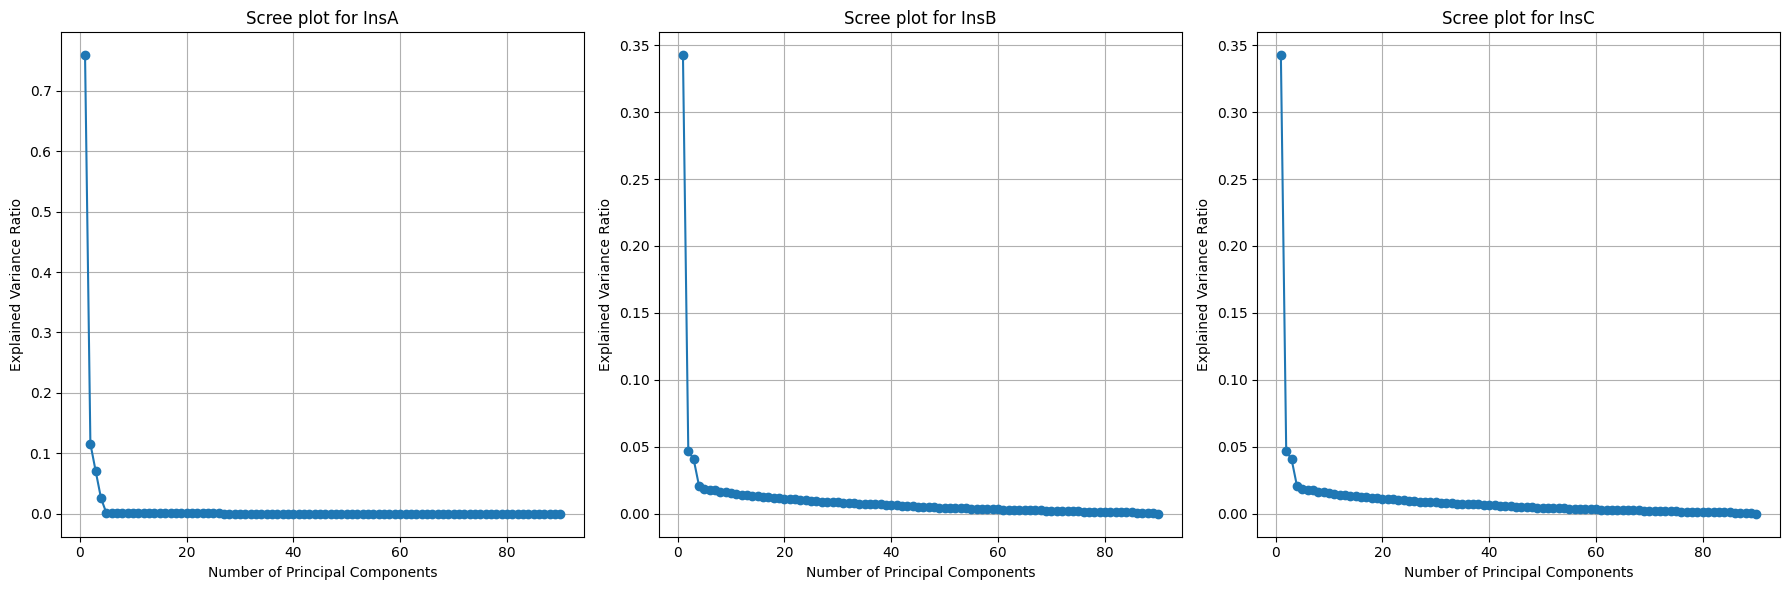

In [64]:
# Plot explained variance for each instrument
plt.figure(figsize=(18, 6))

plt.subplot(131)
plt.plot(range(1, len(explained_variance_insA) + 1), explained_variance_insA, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree plot for InsA')
plt.grid(True)

plt.subplot(132)
plt.plot(range(1, len(explained_variance_insB) + 1), explained_variance_insB, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree plot for InsB')
plt.grid(True)

plt.subplot(133)
plt.plot(range(1, len(explained_variance_insC) + 1), explained_variance_insC, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree plot for InsC')
plt.grid(True)

plt.tight_layout()
plt.show()

### Now that we have a rough idea, let us take an enalarged outlook (let us take 1 to 20 components) to determine the exact location of 

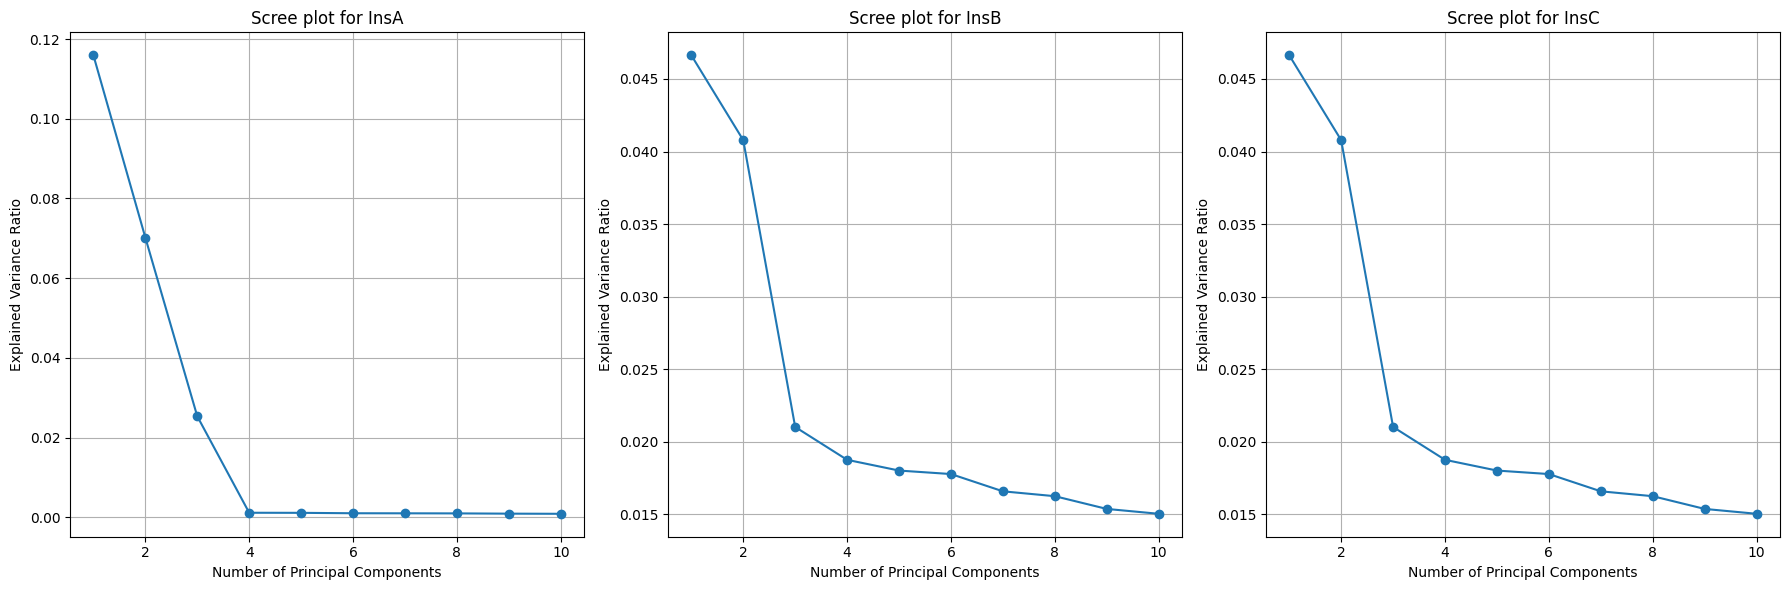

In [65]:
# Plot explained variance for each instrument
plt.figure(figsize=(18, 6))

plt.subplot(131)
plt.plot(range(1, 11), explained_variance_insA[1:11], marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree plot for InsA')
plt.grid(True)

plt.subplot(132)
plt.plot(range(1, 11), explained_variance_insB[1:11], marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree plot for InsB')
plt.grid(True)

plt.subplot(133)
plt.plot(range(1, 11), explained_variance_insC[1:11], marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree plot for InsC')
plt.grid(True)

plt.tight_layout()
plt.show()

### Therefore the appropropriate number of principal components based on the elbow point in scree plot are as follows
### InsA = 4, InsB = 3, InsC = 3

### (b) Another 10 samples were collected and analyzed on InsA (Test data.csv). It is been given that one sample has contaminants in it. Identify which sample among them has been contaminated.

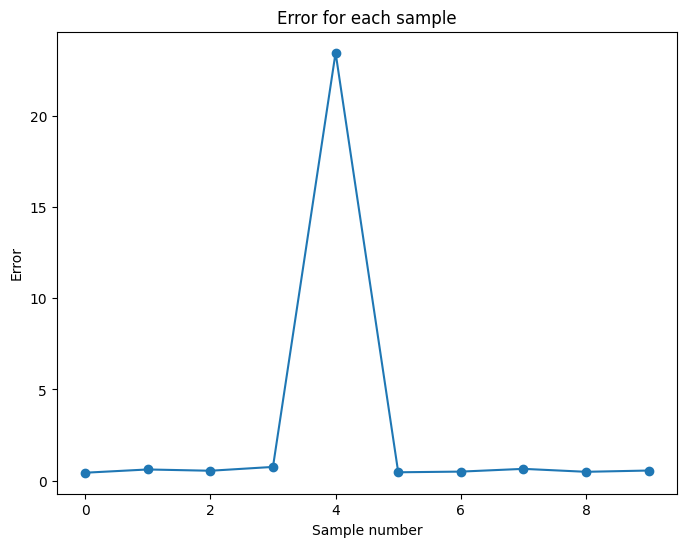

In [66]:
# Standardize the test dataset after fitting the scaler to InsA
scaler = StandardScaler()
scaled_data_insA = scaler.fit_transform(dataframes['InsA'])
scaled_data_test = scaler.transform(dataframes['Test_data'])
#getting the principal components
PC_A = Vta[:4,:]

# Project and reconstruct the test dataset
Test_proj = np.dot(scaled_data_test,PC_A.T)
Test_reconstructed = reconstruct_data_mat(Test_proj,PC_A,5)

# Evaluate the error for each sample
dist = np.zeros(scaled_data_test.shape[0])
for i in range(scaled_data_test.shape[0]):
    dist[i] = np.linalg.norm(np.abs(Test_reconstructed[i]-scaled_data_test[i]))
    error_index = np.argmax(dist)

plt.figure(figsize=(8,6))
plt.plot(dist, marker='o')
plt.ylabel("Error")
plt.xlabel("Sample number")
plt.title("Error for each sample")
plt.show()

In [67]:
print("The sample with conatamination is", error_index + 1)

The sample with conatamination is 5


### Therefore the fifth sample is contaminated